In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.optimizers import SGD
from read_dataset import read_mfcc_with_train_test

Using TensorFlow backend.


In [3]:
X_train, X_test, y_train, y_test = read_mfcc_with_train_test()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(600, 30, 1293)
(400, 30, 1293)
(600, 10)
(400, 10)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


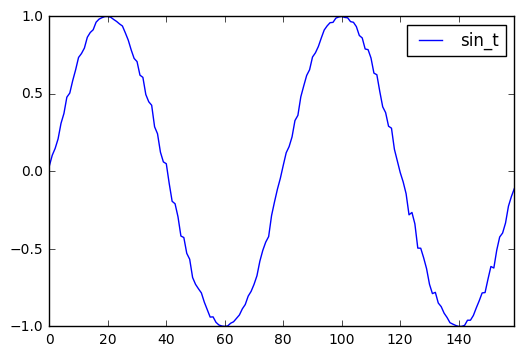

In [8]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [9]:
print(df[["sin_t"]].shape)

(4001, 1)


In [7]:
model = Sequential()

model.add(LSTM(units=10, input_shape=(None, 30, 1)))


ValueError: Input 0 is incompatible with layer lstm_3: expected ndim=3, found ndim=4

In [ ]:
LSTM?

In [ ]:
model = Sequential()

# this layerf from https://keras.io/getting-started/sequential-model-guide/
# Dense(64) is fully-connected layer with 64 hidden units
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)